In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


IMMPORTING THE LIBARARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

IMPORTING THE DATA

In [3]:
train_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

ANALYASING THE DATA

In [4]:
print(train_data.head(5))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [5]:
print(test_data.head(5))

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story           

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [9]:
test_id=test_data['Id']

In [10]:
train_data.drop("Id",axis=1,inplace=True)

In [11]:
test_data.drop("Id",axis=1,inplace=True)

In [12]:
# Checking that ID row has been dropped
print(train_data.shape)
print(test_data.shape)

(1460, 80)
(1459, 79)


EXPLORATORY DATA ANALYSIS (EDA)

SALE PRICE FEATURE

In [13]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

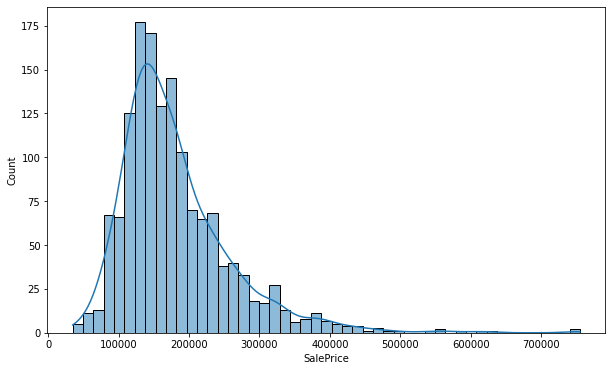

In [14]:
plt.figure(figsize=(10,6))
g=sns.histplot(train_data.SalePrice,kde=True)

In [15]:
print('SalePrice Skewness :', train_data.SalePrice.skew())
print('Kurtosis: ' ,train_data['SalePrice'].kurt())

SalePrice Skewness : 1.8828757597682129
Kurtosis:  6.536281860064529


RELATIONSHIP WITH NUMERICAL VARIABLES:

<AxesSubplot:>

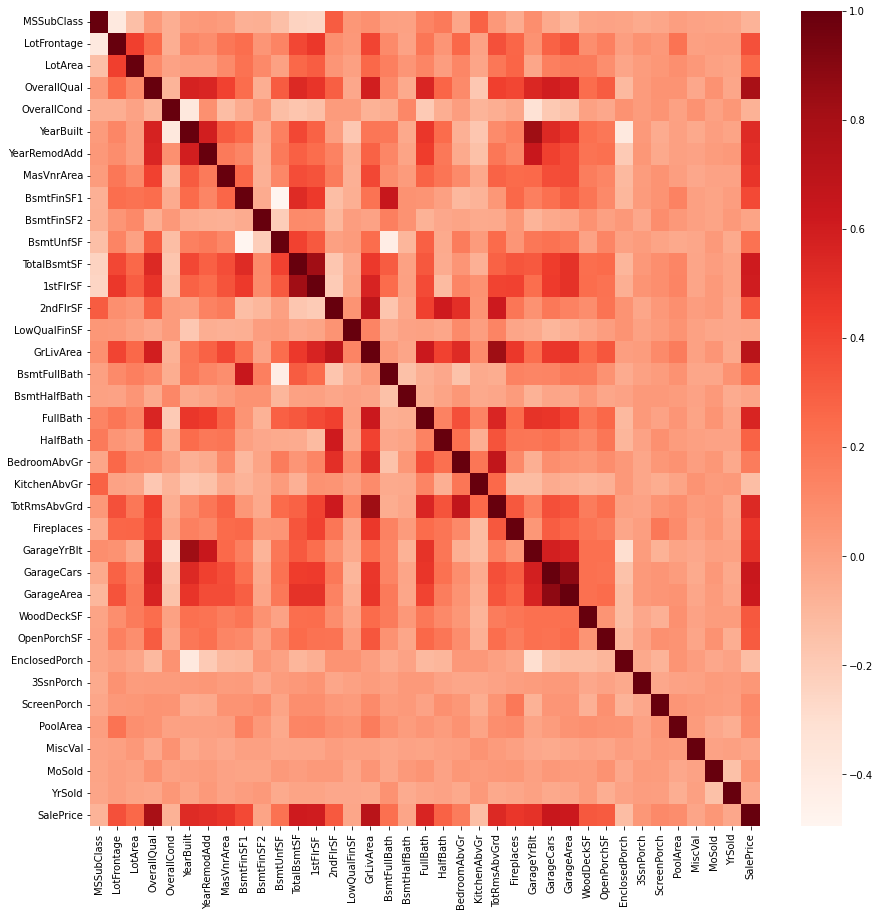

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),cmap="Reds")

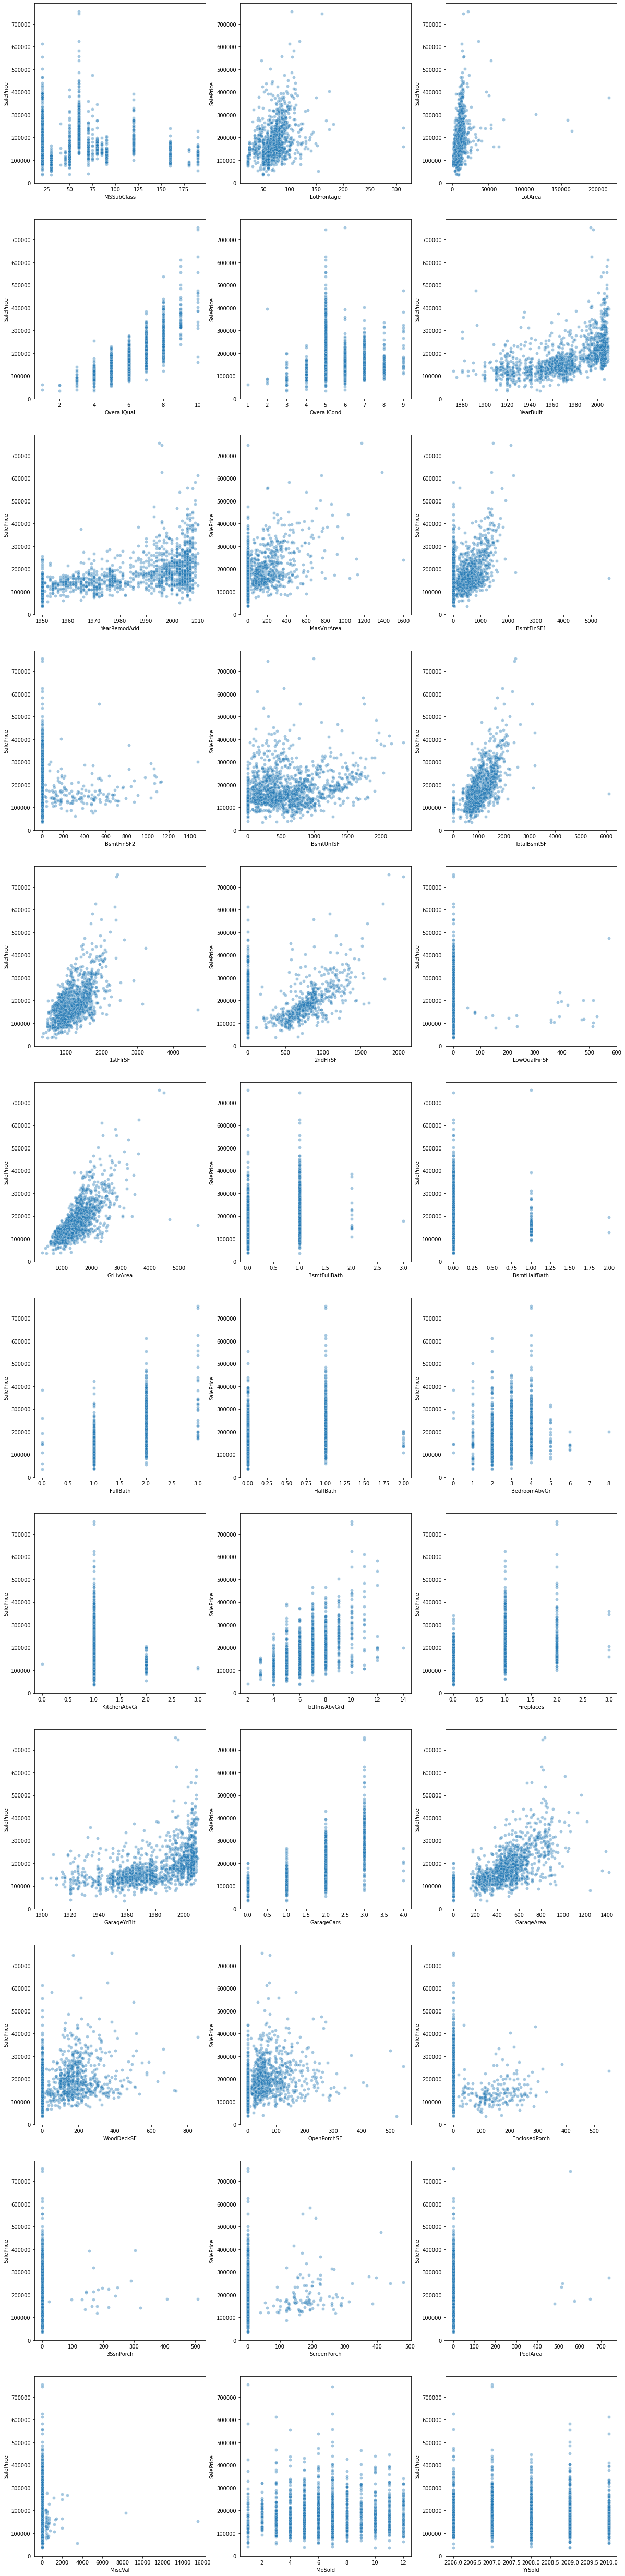

In [17]:
numerical_dtypes=['int16','int32','int64','float16','float32','float64']
numerical_features=[]
for numerical_feat in train_data.columns:
    if train_data[numerical_feat].dtype in numerical_dtypes:
        numerical_features.append(numerical_feat)
plot, ax=plt.subplots(12,3, figsize=(20,90))
for index in range(len(numerical_features)-1):
    sns.scatterplot(data=train_data, y="SalePrice", x=numerical_features[index],alpha=0.4,
                    ax=ax[math.floor(index/3)][index%3])
plt.show()

DATA PREPROCESSING:

In [18]:
all_data=pd.concat([train_data,test_data]).reset_index(drop=True)
sale_price=train_data['SalePrice']
all_data.drop(columns=["SalePrice"],inplace=True)
all_data.shape

(2919, 79)

FILLING MISSING VALUES

In [19]:
def check_missed_values(all_data):
    all_data_none=(all_data.isnull().sum()/len(all_data))*100
    all_data_none=all_data_none.drop(all_data_none[all_data_none==0].index).sort_values(ascending =False)
    missing_data=pd.DataFrame({'Missing_Ratio': all_data_none})
    return missing_data

In [20]:
missing_data=check_missed_values(all_data)
print(missing_data)

              Missing_Ratio
PoolQC            99.657417
MiscFeature       96.402878
Alley             93.216855
Fence             80.438506
FireplaceQu       48.646797
LotFrontage       16.649538
GarageFinish       5.447071
GarageQual         5.447071
GarageCond         5.447071
GarageYrBlt        5.447071
GarageType         5.378554
BsmtExposure       2.809181
BsmtCond           2.809181
BsmtQual           2.774923
BsmtFinType2       2.740665
BsmtFinType1       2.706406
MasVnrType         0.822199
MasVnrArea         0.787941
MSZoning           0.137033
BsmtFullBath       0.068517
BsmtHalfBath       0.068517
Functional         0.068517
Utilities          0.068517
GarageArea         0.034258
GarageCars         0.034258
Electrical         0.034258
KitchenQual        0.034258
TotalBsmtSF        0.034258
BsmtUnfSF          0.034258
BsmtFinSF2         0.034258
BsmtFinSF1         0.034258
Exterior2nd        0.034258
Exterior1st        0.034258
SaleType           0.034258


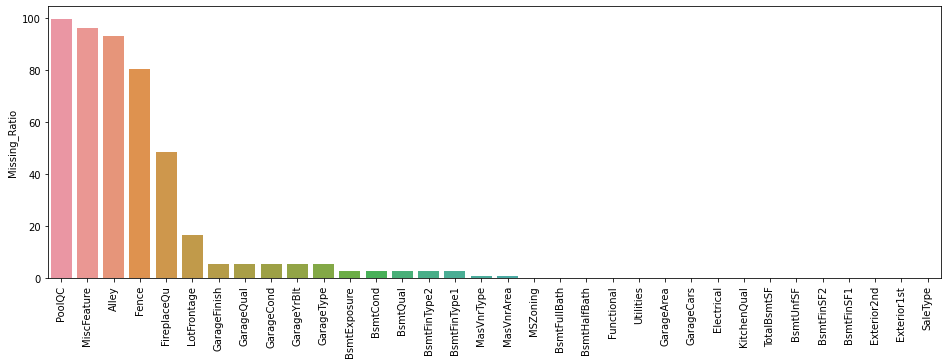

In [21]:
plt.figure(figsize=(16,5))
plt.xticks(rotation='90')
ax=sns.barplot(x=missing_data.index,y=missing_data["Missing_Ratio"])

In [22]:
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("None")
all_data["Alley"]=all_data["Alley"].fillna("None")
all_data["Fence"]=all_data["Fence"].fillna("None")
all_data["FireplaceQu"]=all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"]=all_data["MasVnrType"].fillna("None")


In [23]:
all_data["MasVnrArea"]=all_data["MasVnrArea"].fillna(0)
all_data["MSZoning"]=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"]=all_data["Functional"].fillna("Typ")
all_data["Electrical"]=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data["KitchenQual"]=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])


In [24]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')   
all_data.drop(columns=["Utilities"],inplace=True)
all_data['LotFrontage']=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [25]:
missing_data=check_missed_values(all_data)
missing_data.head()

,Missing_Ratio


NUMERICAL TO CATEGORICAL FEATURE

In [26]:
# Convert Non-Numeric Numbers To String 
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)
all_data['YrSold']=all_data['YrSold'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)

In [27]:
train_data=all_data[:len(train_data)]
train_data["SalePrice"]=sale_price
test_data=all_data[len(train_data):]

1): OverallQual

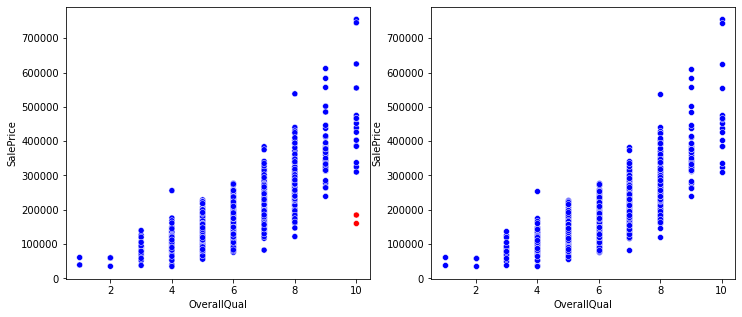

In [28]:
plot,ax=plt.subplots(1,2,figsize=(12,5))
outliers=(train_data['OverallQual']==10)&(train_data['SalePrice']<=250000)
sns.scatterplot(data=train_data,x="OverallQual",y="SalePrice",
                c=["red" if is_outlier else "blue" for is_outlier in outliers], ax=ax[0])
train_data.drop(train_data[(train_data["OverallQual"]==10)&(train_data['SalePrice']<=250000)].index,inplace=True)
sns.scatterplot(data=train_data,x='OverallQual', y='SalePrice', ax=ax[1],c=['blue'])
plt.show()

2) LotFrontage

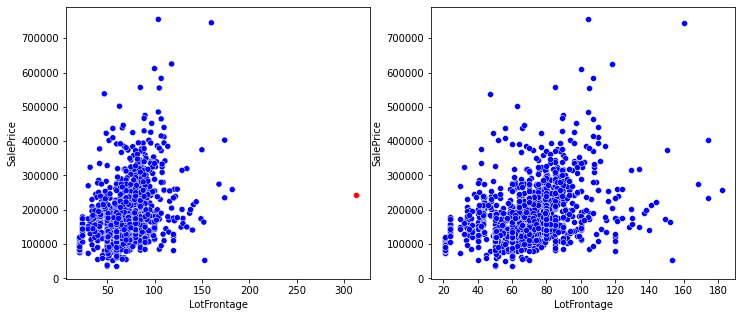

In [29]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["LotFrontage"] >250)
sns.scatterplot(data = train_data ,x = "LotFrontage", y = "SalePrice" , c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
train_data.drop(train_data[train_data["LotFrontage"] >250].index , inplace = True)
sns.scatterplot(data = train_data ,x = "LotFrontage", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

3) GrLivArea

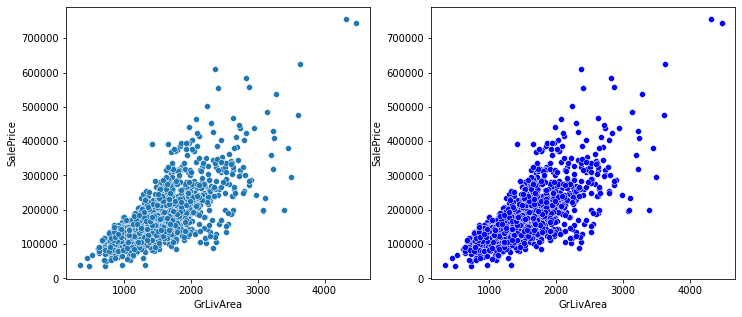

In [30]:
plot, ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(data=train_data,x="GrLivArea", y="SalePrice",ax=ax[0])
sns.scatterplot(data=train_data,x="GrLivArea", y="SalePrice", ax=ax[1],c=["blue"])
plt.show()

4) GarageArea 

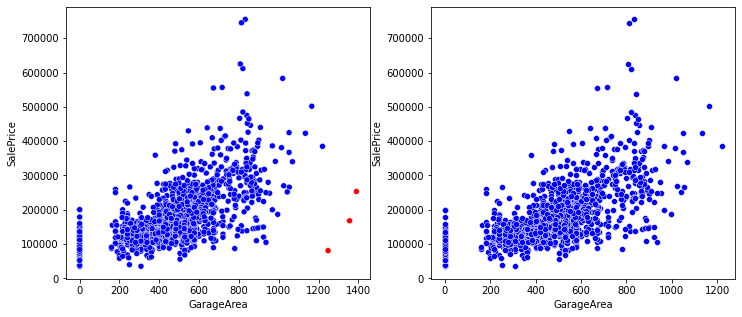

In [31]:
plot,ax=plt.subplots(1,2, figsize=(12,5))
outliers=(train_data["GarageArea"]>1200)&(train_data["SalePrice"]<=300000)
sns.scatterplot(data=train_data, x="GarageArea", y="SalePrice",
                c=["red" if is_outlier else "blue" for is_outlier in outliers], ax=ax[0])
train_data.drop(train_data[(train_data["GarageArea"]>1200)&(train_data["SalePrice"]<=300000)].index,inplace=True)
sns.scatterplot(data=train_data, x="GarageArea", y="SalePrice", c=["blue"],ax=ax[1])
plt.show()

5) LotArea

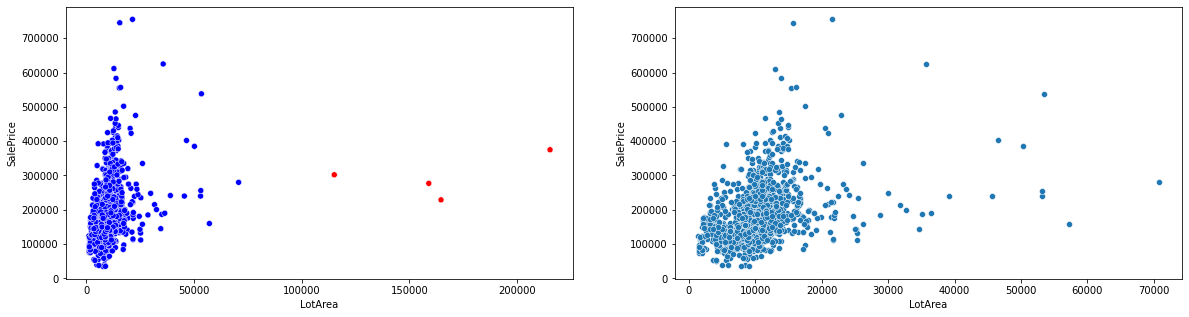

In [32]:
plot , ax = plt.subplots(1 , 2 , figsize = (20 , 5))
outliers = (train_data["LotArea"] >= 100000)
sns.scatterplot(data = train_data ,x = "LotArea", y = "SalePrice" ,  c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
train_data.drop(train_data[ (train_data["LotArea"] >= 100000)].index , inplace = True)
sns.scatterplot(data = train_data ,x = "LotArea", y = "SalePrice", ax = ax[1])
plt.show()

6) YearBuilt

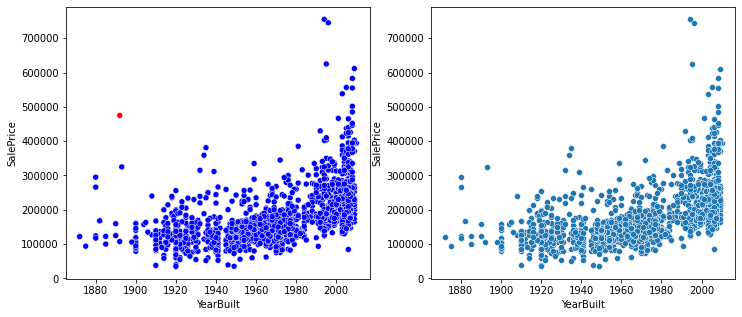

In [33]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["YearBuilt"] < 1900) & (train_data["SalePrice"] >= 400000)
sns.scatterplot(data = train_data ,x = "YearBuilt", y = "SalePrice" ,c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,  ax = ax[0])
train_data.drop(train_data[outliers].index , inplace = True)
sns.scatterplot(data = train_data ,x = "YearBuilt", y = "SalePrice", ax = ax[1])
plt.show()

7) 1stFlrSF:

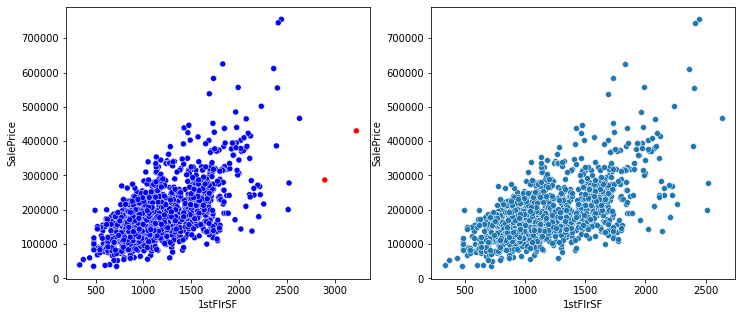

In [34]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["1stFlrSF"] > 2700)
sns.scatterplot(data = train_data ,x = "1stFlrSF", y = "SalePrice" ,c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,  ax = ax[0])
train_data.drop(train_data[outliers].index , inplace = True)
sns.scatterplot(data = train_data ,x = "1stFlrSF", y = "SalePrice", ax = ax[1])
plt.show()


FIXING SKEWNESS FEATURES

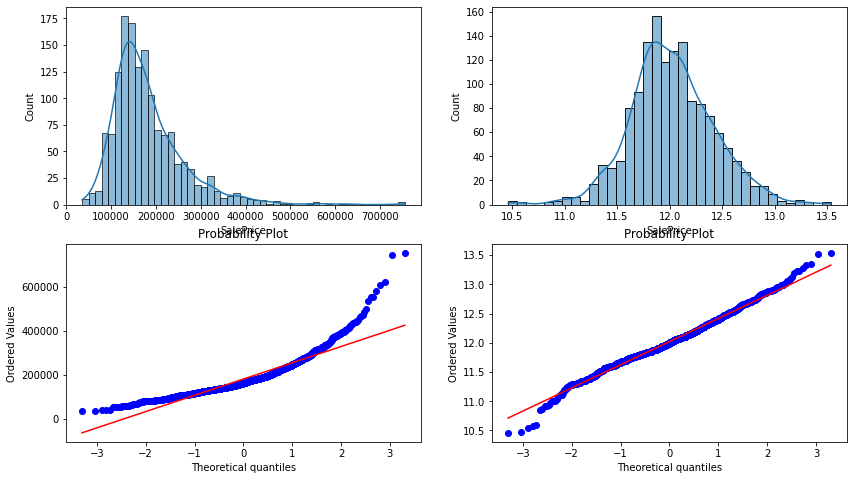

In [35]:
plot,ax=plt.subplots(2,2, figsize=(14,8))
g=sns.histplot(sale_price,kde =True,ax=ax[0][0])
res=stats.probplot(sale_price,plot=ax[1][0])
sale_price=np.log1p(train_data["SalePrice"])
g=sns.histplot(sale_price,kde= True,ax=ax[0][1])
res=stats.probplot(sale_price,plot=ax[1][1])

In [36]:
all_data=pd.concat([train_data,test_data]).reset_index(drop=True)
all_data.drop(columns=["SalePrice"],inplace=True)
all_data.shape

(2906, 78)

SKEW IN NUMERICAL FEATURE

In [37]:
from scipy.stats import norm, skew
numerical_feats=all_data.dtypes[all_data.dtypes!="object"].index
skewed_feats=all_data[numerical_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.931148
PoolArea,17.654963
LowQualFinSF,12.388194
3SsnPorch,11.350139
KitchenAbvGr,4.291165
BsmtFinSF2,4.161925
EnclosedPorch,4.018686
BsmtHalfBath,3.935672
ScreenPorch,3.924461
LotArea,3.627010


In [38]:
skewness=skewness[abs(skewness)>0.75]
print(skewness.shape)
from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)

(33, 1)


ENCODED CATEGORICAL FEATURES:

In [39]:
all_data=pd.get_dummies(all_data).reset_index(drop=True)
all_data.shape

(2906, 329)

In [40]:
all_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,Fireplac

In [41]:
train_data=all_data[:len(train_data)]
test_data=all_data[len(train_data):]

Modeling

In [42]:
#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge ,RidgeCV
from sklearn.linear_model import ElasticNet ,ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [43]:
#Misc.
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings(action="ignore")

In [44]:
target=sale_price
train=train_data

In [45]:
# Setup cross validation folds
kf= KFold(n_splits=12, random_state=42, shuffle=True)
scores={}

In [46]:
# Define Error Metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))
def cv_rmse(model, x=train, y=target):
    rmse=np.sqrt(-cross_val_score(model,x,y,scoring ="neg_mean_squared_error", cv=kf))
    return rmse

DECISION TREE REGRESSOR

In [47]:
decision_tree_model=DecisionTreeRegressor()
score=cv_rmse(decision_tree_model)
print("Decision Tree Model:{:.4f}({:.4f})".format(score.mean(),score.std()))

Decision Tree Model:0.1924(0.0243)


In [48]:
clf =GridSearchCV(decision_tree_model, {
    "max_depth": [6,7,8,9,10,11,12],
    "min_samples_split":[6,7,8,9,10],
    "min_samples_leaf":[5,7,8,9,10]
}, verbose=1)
clf.fit(train,target)
clf.best_estimator_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


DecisionTreeRegressor(max_depth=11, min_samples_leaf=7, min_samples_split=10)

In [49]:
score=cv_rmse(clf.best_estimator_)
print("Decision Tree Model:{:.4f}({:.4f})".format(score.mean(),score.std()))
scores['decision_tree']=(score.mean(),score.std())

Decision Tree Model:0.1757(0.0190)


In [50]:
#Random Forest Model
random_forest_model=RandomForestRegressor(random_state=42)
score=cv_rmse(random_forest_model)
print("Random Forest Model:{:.4f}({:.4f})".format(score.mean(),score.std()))
scores['decision_tree']=(score.mean(),score.std())

Random Forest Model:0.1349(0.0214)


3) Gradient Boost Model

In [51]:
#Gradient Boost Regressor
gbr=GradientBoostingRegressor(loss='huber',random_state=42)
score=cv_rmse(gbr)
print("Gradient_boosting: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Gradient boosting'] = (score.mean(), score.std())

Gradient_boosting: 0.1193 (0.0179)


4) XGBoost Model

In [52]:
#XGBoost Regressor
xgboost= XGBRegressor(objective='reg:squarederror',random_state=42)
print("xgboost_model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Xgboost'] = (score.mean(), score.std())

xgboost_model: 0.1193 (0.0179)


5) Ridge Regressor

In [53]:
# Ridge Regressor
ridge_alphas=[1e-15,1e-10,1e-8,9e-4,7e-4,5e-4,3e-4,1e-4,1e-3,5e-2,1e-2,
              0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=ridge_alphas,cv=kf))
score=cv_rmse(ridge)
print("Ridge Regressor: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge_model'] = (score.mean(), score.std())

Ridge Regressor: 0.1102 (0.0171)


6) Support Vector Machine

In [54]:
# Support Vector Regressor
svr=make_pipeline(RobustScaler(),SVR(C=20,epsilon=0.008,gamma=0.0003))
score=cv_rmse(svr)
print("Support Vector Machine: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Support Vector Machine'] = (score.mean(), score.std())

Support Vector Machine: 0.1097 (0.0186)


7) LightGradient Boosting Regressor

In [55]:
# Light Gradient Boosting Regressor:
lightgbm=LGBMRegressor(objective='regression',verbose=1,random_state=42)
score=cv_rmse(lightgbm)
print("Light Gbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Lgbm'] = (score.mean(), score.std())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3428
[LightGBM] [Info] Number of data points in the train set: 1326, number of used features: 224
[LightGBM] [Info] Start training from score 12.028299
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3410
[LightGBM] [Info] Number of data points in the train set: 1326, number of used features: 222
[LightGBM] [Info] Start training from score 12.025627
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the ove

TRAIN ON FULL DATA

In [56]:
decision_tree_model_full_data=decision_tree_model.fit(train,target)
random_forest_model_full_data=random_forest_model.fit(train,target)
gbr_full_data=gbr.fit(train,target)
xgboost_full_data=xgboost.fit(train,target)
ridge_full_data=ridge.fit(train,target)
svr_full_data=svr.fit(train,target)
lightgbm_full_data=lightgbm.fit(train,target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3497
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 227
[LightGBM] [Info] Start training from score 12.020667


8) Blended_Model

In [57]:
# Blend model in order to make the final prediction more robust to overfitting
def blended_predictions(X):
    return (0.1*random_forest_model_full_data.predict(X))+\
           (0.2*gbr_full_data.predict(X))+\
           (0.1*xgboost_full_data.predict(X))+\
           (0.2*ridge_full_data.predict(X))+\
           (0.1*lightgbm_full_data.predict(X))+\
           (0.3*svr_full_data.predict(X))

In [58]:
# Get Final Prediction From Blended Model
blended_score= rmsle(target,blended_predictions(train))
scores['blended']=(blended_score,0)
print('RMSLE on Train data: ')
print(blended_score)

RMSLE on Train data: 
0.06841819879114314
